# [주행 샘플 데이타 모델학습] Google Colaboratory를 활용한 동키카 학습을 위한 단계별 가이드

@2019-06-12/Ignitespark

Google에서 지원하는 Colaboratory 환경에서 Donkey의 주행 영상데이타를 활용해서 신경회로망의 학습을 단계적으로 수행하도록 안내하는 노트북입니다.

### 변경이력
2020-11-25일자에서는 Google Tensorflow 2.0 alpha버전에서 동작하도록 작성되었으나, 2020-06-12일자 현재 기본적으로 2.X가 지원됨으로 이 버전에서 동작하도록 코드를 수정하였습니다.

*(Reference)* 

본 코드는 Sachindroid8님이 작성하신 Google Colaboratory기반의 Donkey Training 주피터 노트북에 기반하여 내용을 한글화하고, 교육에 필요한 내용을 추가하여 확장하였습니다. Sachindroid8님이 작성하신 Git의 코드 주소는 아래와 같습니다.

https://github.com/sachindroid8/self-driving-car-using-google-colab

# 0 > Google Colaboratory를 사용하기 전에 알아두어야할 사항들

Google Colaboratory는 구글이 지원하는 머신러닝 및 데이타처리를 위한 무료 서비스 플랫폼입니다. Google Colaboratory에서는 고성능의 GPU를 제공하여 머신러닝의 학습속도를 빠르게 수행할 수 있는 우수한 기능을 제공하고 있습니다. 이런 기능들을 활용하는데 있어서 반드시 알아두어야할 사항들은 아래와 같습니다.


* Google Colaboratory는 12시간 동안만 사용 가능합니다. 사용자가 프로그램 수행을 위한 노트를 개설하고 수행하는데 있어서 최대 12시간 이내에서만 사용할 수 있습니다. Google Colaboratory는 12시간이 지나면 개인에게 할당했던 모든 컴퓨팅 자원(CPU,메모리,GPU등)을 리셋(재설정)합니다.

* 12시간 이내라도 80분간 사용하지 않으면, 개인에게 할당했던 모든 컴퓨팅 자원(CPU,메모리,GPU등)을 리셋(재설정)합니다.

* 할당된 자원이 리셋(재설정)되었다고 다시 사용하지 못하는 것은 아닙니다. 개인의 구글 드라이브에 저장된 Google Laboratory에서 작성한 주피터 노트북을 다시 로드하고 프로젝트를 새로이 시작하면 됩니다. 또 다른 12시간의 개발과 테스팅 시간이 시작됩니다.

* Google Laboratory에서 수행한 내용들은 주피터 노트북에 과정과 내용을 기록하여 재 사용가능하도록 합니다. 생성하거나 사용한 노트북은 개인의 구글 드라이브에 파일로 저장이 가능합니다.

# 1 > Google Colaboratory의 컴퓨팅 환경

구글의 Colaboratory에서 지원되는 기본적인 컴퓨팅 환경의 다양한 정보들을 통해 성능을 확인해봅니다.

## 1.1 OS 확인하기

In [ ]:
! cat /etc/issue.net

Ubuntu 18.04.3 LTS


## 1.2 Google Colaboratory GPU 정보보기

In [ ]:
! nvidia-smi

Fri Jun 12 05:48:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |    219MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.3 메모리 용량 파악하기

In [ ]:
! cat /proc/meminfo

MemTotal:       13333556 kB
MemFree:         8011868 kB
MemAvailable:   11811456 kB
Buffers:           85476 kB
Cached:          3788316 kB
SwapCached:            0 kB
Active:          1866664 kB
Inactive:        3024208 kB
Active(anon):     924168 kB
Inactive(anon):     8524 kB
Active(file):     942496 kB
Inactive(file):  3015684 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               192 kB
Writeback:             0 kB
AnonPages:       1017060 kB
Mapped:           656304 kB
Shmem:              9140 kB
Slab:             212652 kB
SReclaimable:     164524 kB
SUnreclaim:        48128 kB
KernelStack:        3920 kB
PageTables:         8864 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3277864 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              912 kB
AnonHugePages:   

## 1.4 CPU 정보 파악하기

In [ ]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multihit
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits 

# 2 > 텐서플로우 버전 확인하기
텐서플로우(tensorflow)와 Keras의 설치 버전을 확인합니다.

In [ ]:
import keras
import tensorflow as tf

print("Tensorflow 버전(version) = ",tf.__version__)
print("Keras 버전(version) = ",keras.__version__)

Tensorflow 버전(version) =  2.2.0
Keras 버전(version) =  2.3.1


# 3 > GPU 할당 체크하기
"Found GPU at: / device: GPU: 0"이 표시되면, GPU가 이미 사용중이라는 의미입니다.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 4 > Donkeycar 프로그램 설치

* Donkeycar의 영상데이타 기반의 학습프로그램을 활용하기 위해서 Donkeycar의 프로그램들을 Google Colaboratory에 설치해야 합니다.

* Git에 저장되어 있는 Donkeycar 프로그램 저장소에서 관련 소스코드를 가져와서 Google Colaboratory에 폴더를 생성하고 해당 소스코드를 복사하여 설치합니다.

In [ ]:
!git clone https://github.com/autorope/donkeycar.git donkey

Cloning into 'donkey'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 13091 (delta 7), reused 11 (delta 3), pack-reused 13064
Receiving objects: 100% (13091/13091), 67.78 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (8267/8267), done.


### (Q) 저장된 Donkeycar 소스코드는 어디에 ?

Git에서 가져온 코드들은 Google Colaboratory의 탐색창의 상단의 파일 메뉴를 클릭하면 설치된 소스코드의 디렉토리를 아래와 같이 확인이 가능합니다.

* Google Colaboratory의 파일은 /content 아래에 위치합니다.
* 사용자가 mydata라는 새로운 디렉토리(폴더)를 생성했다면, 실제 Google Colaboratory에서는 /content/mydata 라는 폴더가 생성됩니다.

![DonkeyCar Git Source Codes Folder](https://monosnap.com/image/D77tX8IBcCjXkYXecg10rePefzBwHh)


## 4.1 DonkeyCar 프로그램 설치하기

DonkeyCar 프로그램 소스코드가 저장된 donkey폴더 내의 setup.py 파일을 사용해서 설치를 진행합니다.

In [ ]:
!pip3 install -e donkey

Obtaining file:///content/mycar/donkey
  Found existing installation: donkeycar 3.1.2
    Can't uninstall 'donkeycar'. No files were found to uninstall.
  Running setup.py develop for donkeycar


## 4.2 DonkeyCar 프로젝트 생성하기

DonkeyCar에 대한 나만의 프로젝트를 새로이 생성합니다. 프로젝트를 생성하기 위해서는 프로젝트 이름이 필요합니다. 여기서는 mycar라는 프로젝트명을 사용합니다. Donkeycar의 프로젝트 생성 형식은 다음과 같습니다.

$ donkey createcat --path /content/mycar [enter]

In [ ]:
!donkey createcar --path /content/mycar

using donkey v3.1.2 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Car app already exists. Delete it and rerun createcar to replace.
Car config already exists. Delete it and rerun createcar to replace.
Train already exists. Delete it and rerun createcar to replace.
Calibrate already exists. Delete it and rerun createcar to replace.
Donkey setup complete.


### (Q) 생성된 mycar 프로젝트는 어디에 ?

탐색창의 파일을 클릭하면, 다음과 같이 mycar폴더가 새롭게 생성되었다는 것을 확인할 수 있습니다. mycar폴더에는 3개의 폴더오 4개의 파이썬 파일이 생성됩니다.

![Donkeycar User-Defined Project Folder](https://monosnap.com/image/6UyY8OSIyX48eLfKnhdDqw89kd3oPk)

## 4.3 라즈베리파이의 주행데이타를 Google Colaboratory로 이동 준비(PC/노트북)

* 라즈베리파이에 저장된 주행 영상데이타는 프로젝트 파일 폴더(예를 들어 mydonkey라고 가정) 아래에 data 폴더 아래에 tub_라는 이름을 시작하는 폴더에 순차번호를 붙여서 저장되어 있습니다. 예를들어, 폴더명이 tub_1_19-11-09라면, 11월 09일에 주행한 첫번째 주행영상이라는 의미로 해석이 가능합니다(~/mydokey/data/tub_1_19-11-09).

* 주행데이타는 개별(1회분의 주행영상)은 물론이고 여러개의 풀더(여러번의 주행영상들)을 모두 학습에 활용할 수 있기때문에 우선 PC로 모두 이동하여 저장하는 방법이 유용합니다.

* 라즈베리파이로 부터 주행데이타를 폴더 단위로 복사를 완료했다면, tub_ 폴더들을 Google Laboratory로 업로드하기 위해서 zip으로 묶고, 압축된 파일을 Google Laboratory로 업로드합니다.

![Alt text](https://monosnap.com/image/cLWMOMwqgzhLhg2io0DgSBaov7NWKb)

## 4.4 주행데이타를 노트북/PC에서 Google Colaboratory로 업로드하기

### <donkeycar의 주행데이타 샘플을 활용해서 학습하기>

PC/노트북에서 Google Colaboratory로 압축된 데이타 파일을 업로드하기 위한 절차와 과정은 다음과 같습니다. 

해당 과정을 수행하는 코드는 설명 다음 섹션에 있습니다.

1. 새로운 데이타를 로드하기 위해서 donkeycar 프로젝트 플더 아래의 위치한 data 디렉토리를 삭제합니다.
2. Donkeycar Simulator의 샘플 데이타를 다운로드하고, 압축을 풉니다(tar) 

In [ ]:
%cd /content/mycar

/content/mycar


In [ ]:
# /content/mycar 아래의 data파일들을 모두 삭제
%rm -rf data

In [ ]:
# 주행데이타 삭제를 확인
%ls -l

total 13272
-rw-r--r-- 1 root root     3340 Jun 12 03:54 calibrate.py
-rw-r--r-- 1 root root    16278 Jun 12 03:54 config.py
drwxr-xr-x 8 root root     4096 Jun 12 05:49 donkey/
drwxr-xr-x 2 root root     4096 Jun 12 03:54 logs/
-rw-r--r-- 1 root root    26992 Jun 12 03:54 manage.py
drwxr-xr-x 2 root root     4096 Jun 12 04:49 models/
-rw-r--r-- 1 root root    16827 Jun 12 03:54 myconfig.py
drwxr-xr-x 2 root root     4096 Jun 12 04:02 __pycache__/
-rw-r--r-- 1 root root 13465600 Jun 12 05:52 sample_data.tar
-rw-r--r-- 1 root root    36395 Jun 12 03:54 train.py


In [ ]:
# Donkeycar Simulator의 샘플 데이타 다운로드하기

!wget -O sample_data.tar  https://drive.google.com/u/1/uc?id=1A5sTSddFsf494UDtnvYQBaEPYX87_LMp&export=download

--2020-06-12 06:01:33--  https://drive.google.com/u/1/uc?id=1A5sTSddFsf494UDtnvYQBaEPYX87_LMp
Resolving drive.google.com (drive.google.com)... 172.217.194.138, 172.217.194.113, 172.217.194.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cgg7d50iv6rsi1mqlargeo2guvaugbf3/1591941675000/06330618834888609506/*/1A5sTSddFsf494UDtnvYQBaEPYX87_LMp [following]
--2020-06-12 06:01:43--  https://doc-0o-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cgg7d50iv6rsi1mqlargeo2guvaugbf3/1591941675000/06330618834888609506/*/1A5sTSddFsf494UDtnvYQBaEPYX87_LMp
Resolving doc-0o-7c-docs.googleusercontent.com (doc-0o-7c-docs.googleusercontent.com)... 74.125.68.132, 2404:6800:4003:c02::84
Connecting to doc-0o-7c-docs.googleusercontent.com (doc-0o-7c-docs.googleusercontent.com)

In [ ]:
# 샘플 데이타의 압축을 풉니다

!tar -xvf sample_data.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
data/gen_track_usr_drv_recovery/record_153.json
data/gen_track_usr_drv_recovery/337_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/325_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/418_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/13_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/138_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/record_222.json
data/gen_track_usr_drv_recovery/record_76.json
data/gen_track_usr_drv_recovery/record_110.json
data/gen_track_usr_drv_recovery/record_183.json
data/gen_track_usr_drv_recovery/record_137.json
data/gen_track_usr_drv_recovery/14_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/240_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/385_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/291_cam-image_array_.jpg
data/gen_track_usr_drv_recovery/record_57.json
data/gen_track_usr_drv_recovery/record_381.json
data/gen_track_usr_drv_recovery/130_cam-image_array_.jpg
data/gen_track

In [ ]:
# 주행데이타 압축파일 삭제

%rm -f /content/mycar/sample_data.tar

In [ ]:
# 압축파일의 삭제 여부 체크

%ls -l

total 124
-rw-r--r-- 1 root root  3340 Jun 12 03:54 calibrate.py
-rw-r--r-- 1 root root 16278 Jun 12 03:54 config.py
drwxr-xr-x 4 1000 1000  4096 Jul 10  2019 data/
drwxr-xr-x 8 root root  4096 Jun 12 05:49 donkey/
drwxr-xr-x 2 root root  4096 Jun 12 03:54 logs/
-rw-r--r-- 1 root root 26992 Jun 12 03:54 manage.py
drwxr-xr-x 2 root root  4096 Jun 12 04:49 models/
-rw-r--r-- 1 root root 16827 Jun 12 03:54 myconfig.py
drwxr-xr-x 2 root root  4096 Jun 12 04:02 __pycache__/
-rw-r--r-- 1 root root 36395 Jun 12 03:54 train.py


In [ ]:
%pwd

'/content/mycar'

# 5> Donkeycar 주행영상데이타를 활용한 자율주행모델 학습하기

동키카에서 지원되는 학습모듈을 사용해서 주행영상 데이타 기반의 인공지능 학습을 진행합니다. CNN(Convolution Neural Network)기반의 이미지 식별을 통한 모델 학습으로 주행영상과 실제 주행시 함께 획득한 속도와 주행방향에 대한 데이타를 입력으로 하여 주행 모델을 학습하게 됩니다.

In [ ]:
!python /content/mycar/manage.py train --model /content/mycar/models/mypilot.h5

using donkey v3.1.2 ...
loading config file: /content/mycar/config.py
myconfig myconfig.py
loading personal config over-rides from myconfig.py

config loaded
2020-06-12 06:05:47.365407: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
using default model type of linear
"get_model_by_type" model Type is: linear
2020-06-12 06:05:49.140128: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-12 06:05:49.144929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-12 06:05:49.145529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwid

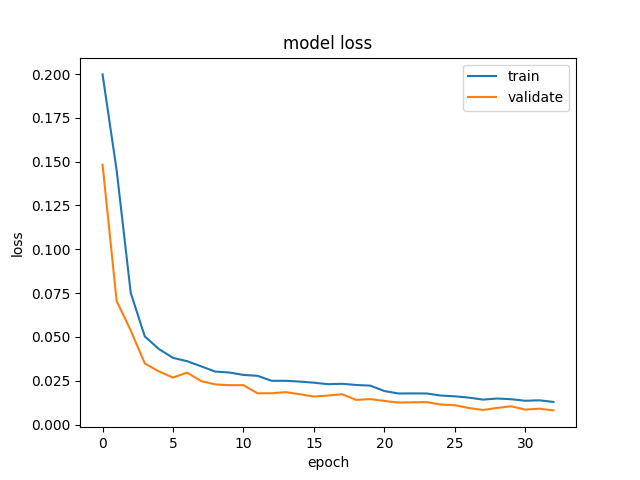

In [ ]:
# 학습과정의 손실-인식율 그래프로 표시
# models 디렉토리에 *.png파일로 저장

from IPython.display import Image
import os

models_dir = '/content/mycar/models'
acc_loss_filepath = 'mypilot.h5_loss_acc_0.008071.png'

filename = os.path.join(models_dir, acc_loss_filepath)
Image(filename=filename)

# 6> 학습한 모델 PC/노트북에 다운로드 하기

* Google Colaboratory의 탐색창에서 파일 섹션으로 이동합니다. 

* Google Colaboratory에서 학습한 모델을 저장하고 있는 디렉토리(models)를 클릭하고 이동합니다. 사용자의 프로젝트 폴더가 mycar라면, mycar/models 디렉토리에 학습한 인공지능 모델이 저장되어 있습니다.

* 학습한 모델은 확장자로 *.h5를 사용합니다. 다운로드할 모델파일을 선택하고, 마우스의 오른쪽 버튼을 누르면 선택한 파일의 '다운로드' 메뉴항목이 표시됩니다. 해당 항목을 선택하면 노트북/PC에 모델을 다운로드 할 수 있습니다.


![Alt text](https://monosnap.com/image/XpGITFyzwgkqjNI7c40fsv91KRpTqw)

* 학습한 모델을 저장한 폴더에는 저장된 모델명 파일(여기서는 mypolot.h5)의 학습과정동안 계산된 loss(손실)과 정확도(accurracy)에 대한 값을 그래프로 표현한 png파일도 함께 저장되어 있습니다. 결과값에 대한 파일명은 "모델명_loss_acc_정확도실수값.png"의 형식으로 표현됩니다.

<img src="https://monosnap.com/image/Xrnv8MfkNS8opa46LAcNvuHnmHPu9Q" width="480" height="320" />

# 7> 자율주행모드로 동키카 운행하기

* PC/노트북에 다운로드한 인공지능 모델을 ExtFS for Windows 소프트웨어를 활용해서 라즈베리파이의 SD카드를 읽어들려 해당 프로젝트 파일의 models 폴더에 저장합니다. 

* 저장이 완료된 모델을 탑재한 라즈베리파이 SD카드를 동키카에 적재하고 동키카에 전원을 넣어 부팅합니다.

* 노트북/PC에서 SSH로 동키카에 접속한 후, 아래의 명령을 입력하여 자율주행 모드로의 실행을 설정합니다.

```
# 동키카에 탑재된 라즈베리파이에서 수행할 코드

$cd mycar [enter]
$python manage.py drive --model /mycar/models/mypilot.h5 [enter]
```




